# Intermittent Fasting - A Statistical Self-Study

This study will help me learn how food and excercise are affecting my weight and overall well-being. I am using historical data (unfortenately not continuous) exported from myfitnesspal acount. It covers a period of 6 years of unsuccessfull weight management strategies. 

Since 07.12.2017 I have decided to try a new strategy called Intermittent Fasting. I came accross this strategy in a youtube video from Dr. Jason Fung who advocates the health benefits from fasting in general. And so after conducting some research on the topic I decided to follow the so called "Warrior Diet" proposed from Ori Hofmekler. However I took the idea further and  restricted the eating plan even more by combining it with Low Carbohydrate Diet.

So in the end I eat only once a day, usually at dinner, and when I do that I try to minimize the amount of strachy carbohydrates in my meals. In simple words - no rice, bread or potatoes.

## Table of Contents
1. Data description
2. Loading and manipulating the data
3. Exploratory data analysis
4. Calories Equation Model
5. Linear Regression Model
6. Regression Tree Model
7. Neural Network Model
8. Comparison and Evaluation of the different Models
9. Meal optimization
9. Insights from the data

### 1. Data Description

The data which I use is collected in my Myfitnesspal account. When I export it in a csv file format it comes in three separate files - Exercise-Summary.csv, Measurement-Summary.csv and Nutrition-Summary.csv.

**Exercise-Summary.csv**
* Date - [YYYY-MM-DD] - observation date
* Excercise - [String] - description of the exercise
* Type - [cardio/strength] - type of the exercise
* Calories - [num] - calories burned during the exercise
* Exercise Minutes - [num] - minutes spend on the exercise
* Sets - [num] - number of sets
* Reps per Set - [num] - number of repetitions per set
* Kilograms - [num] - kilograms for each repetition
* Steps - [num] - steps count from the exercise (via Google Fit / Mi Fit)

**Measurement-Summary.csv**
* Date - [YYYY-MM-DD] - observation date
* % Body Fat - [num] - percentage of body fat
* Biceps - [num] - biceps circumference in cm
* Calves - [num] - calves circumference in cm
* Hips - [num] - hips circumference in cm
* Neck - [num] - neck circumference in cm
* Tights - [num] - tights circumference in cm
* Waist - [num] - waist circumference in cm
* Weight - [num] - weight in kg

**Nutrition-Summary.csv**
* Date - [YYYY-MM-DD] - observation date
* Meal - [String] - meal name [breakfast/lunch/dinner/snack]
* Calories - [num] - number of calories for the meal
* Fat g - [num] - grams of fat for the meal
* Saturated Fat - [num] - grams of saturated fat for the meal
* Polysaturated Fat - [num] - grams of polysaturated fat for the meal
* Monosaturated Fat - [num] - grams of monosaturated fat for the meal
* Trans Fat - [num] - grams of trans fat for the meal
* Cholesterol - [num] - mg of cholesterol for the meal
* Sodium (mg) - [num] - mg of sodium for the meal
* Potassium - [num] - mg of potassium for the meal
* Carbohydrates (g) - [num] - grams of carbohydrates for the meal 
* Fiber - [num] - grams of fiber for the meal
* Sugar - [num] - grams of sugar for the meal
* Protein (g) - [num] - grams of protein for the meal
* Vitamin A - [num] - % of the recommended daily intake
* Vitamin C - [num] - % of the recommended daily intake
* Calcium - [num] - % of the recommended daily intake
* Iron - [num] - % of the recommended daily intake

### 2. Loading and Manipulating the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

First I will read the data I have into a pandas dataframes:

In [2]:
exercise = pd.read_csv('myfitnesspal/Exercise-Summary.csv', index_col = 0)
measurement = pd.read_csv('myfitnesspal/Measurement-Summary.csv', index_col = 0)
nutrition = pd.read_csv('myfitnesspal/Nutrition-Summary.csv', index_col = 0)

Before I start manipulating my data I want to check the exact time period which I have data for in each csv file. I am doing this as I am not sure if all the data is for the same time intervals

In [3]:
# converting the index of the dataframes into a date-time format
exercise.index = pd.to_datetime(exercise.index)
measurement.index = pd.to_datetime(measurement.index)
nutrition.index = pd.to_datetime(nutrition.index)

# printing the time intervals
print("Exercise Period :  ", exercise.index[0] , ' - ', exercise.index[-1])
print("Measurement Period :  ", measurement.index[0] , ' - ', measurement.index[-1])
print("Nutrition Period :  ", nutrition.index[0] , ' - ', nutrition.index[-1])

print("Overall Period: ", min(exercise.index[0],measurement.index[0],nutrition.index[0]), ' - ',
                          max(exercise.index[-1],measurement.index[-1],nutrition.index[-1]))

# assigning overall common start and end dates which I will use to build my analysis dataframe
startDate = min(exercise.index[0],measurement.index[0],nutrition.index[0])
endDate = max(exercise.index[-1],measurement.index[-1],nutrition.index[-1])

Exercise Period :   2012-11-10 00:00:00  -  2018-03-06 00:00:00
Measurement Period :   2012-11-10 00:00:00  -  2018-03-06 00:00:00
Nutrition Period :   2012-11-10 00:00:00  -  2018-03-06 00:00:00
Overall Period:  2012-11-10 00:00:00  -  2018-03-06 00:00:00


Now I will check the structure for each dataframe:

In [4]:
exercise.head()

,Exercise,Type,Exercise Calories,Exercise Minutes,Sets,Reps Per Set,Kilograms,Steps
Date,,,,,,,,
2012-11-10,Dips,Strength,NaN,NaN,7.0,10.0,36.3,NaN
2012-11-10,"Rowing, stationary, very vigorous effort",Cardio,227.0,22.0,NaN,NaN,NaN,NaN
2012-11-10,"Step-ups, vigorous",Cardio,251.0,20.0,NaN,NaN,NaN,NaN
2012-11-11,Chin-Ups,Strength,NaN,NaN,3.0,8.0,36.3,NaN
2012-11-11,Dips,Strength,NaN,NaN,5.0,10.0,36.3,NaN


In [5]:
measurement.head()

,% Body Fat,Biceps,Calves,Hips,Neck,Tights,Waist,Weight
Date,,,,,,,,
2012-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.8
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.1
2012-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5
2012-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.9
2012-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.2


In [6]:
nutrition.head()

,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
Date,,,,,,,,,,,,,,,,,,
2012-11-10,Breakfast,230.0,18.8,2.6,4.0,8.0,0.0,0.0,120.2,190.0,5.4,3.2,1.2,12.8,0.0,0.0,34.0,8.0
2012-11-10,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0
2012-11-10,Dinner,829.2,56.1,22.6,3.7,19.5,0.0,0.0,281.0,1627.5,74.0,7.5,72.0,25.7,89.6,127.8,17.8,12.2
2012-11-11,Breakfast,574.0,28.4,18.7,0.0,0.0,0.0,0.0,186.0,0.0,60.7,0.0,53.9,18.5,0.0,0.0,0.0,0.0
2012-11-11,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0


The first thing which I don't like about this data is the presence of NaN values in my columns. I want to replace this with 0s so I can actually make calculations and etc.

I know that I haven't filled the variables Sets, Reps Per Set and Kilograms consistently thus there is no point keeping them for our analysis. On the other hand you can see that the dataframe have multiple rows with the same index (3 entries for the same date) my aim is to simply aggregate this data to a single value and have only one entry per day which can describe all the data in the original table.

In order to accomplish the data aggregation I will add some categorical variables to my excercise dataframe **Strength Training  - [yes/no]**


It will not be much fun to try to aggregate the dataframe in place so I will simply make a new dataframe and transfer the aggregated information into it. Another reason why I don't want to do it in place is that my index values (the dates) are not continuous, for example some of the days I haven't logged any activity. In the end I want to perform a time-series analysis of this data and I would prefer not to have "holes" in the time-series. Thus I will add all missing days and simply give them value of 0.

In [7]:
exercise.fillna(value=0, inplace=True)

exercise_agg = pd.DataFrame(-1, columns=['Calories Burned', 
                                        'Cardio Minutes', 
                                        'Strength Training'
                                       ], index=pd.date_range(start=startDate, end=endDate ,freq='D'))

exercise_agg['Calories Burned'] = exercise.groupby('Date')['Exercise Calories'].sum()
exercise_agg['Cardio Minutes'] = exercise.groupby('Date')['Exercise Minutes'].sum()
exercise_agg['Strength Training'] = exercise.groupby('Date')['Exercise Calories'].min()
exercise_agg['Steps'] = exercise.groupby('Date')['Steps'].sum()
exercise_agg.fillna(value=0, inplace=True)


    def boolStrength(x):
        if x == 0.0:
            return 'yes'
        else:
            return 'no'

exercise_agg['Strength Training'] = exercise_agg['Strength Training'].apply(lambda x: boolStrength(x))

And finally we got our data in the following form:

In [8]:
exercise_agg.head()

,Calories Burned,Cardio Minutes,Strength Training,Steps
2012-11-10,478.0,42.0,yes,0.0
2012-11-11,577.0,55.0,yes,0.0
2012-11-12,482.0,55.0,no,0.0
2012-11-13,441.0,40.0,yes,0.0
2012-11-14,0.0,0.0,yes,0.0


## Data Engineering for the Measurement Dataframe
Showing the structure of the measurement dataframe

In [9]:
measurement.head()

,% Body Fat,Biceps,Calves,Hips,Neck,Tights,Waist,Weight
Date,,,,,,,,
2012-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.8
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.1
2012-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5
2012-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.9
2012-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.2


I know that my measurments for hips, neck and waist are total garbage as I measured them only once and it wasn't even a proper measurment, thus I will simply remove them from the dataframe. Next thing which I will do is to extend the time-series of measurements and add all missing days. Now the question is what will I fill for weight for the days where I actually didn't measure it. Well I will use linear interpolation to fill in all the gaps.

In [10]:
measurement.drop(['Hips','Neck','Waist'], axis=1, inplace=True)

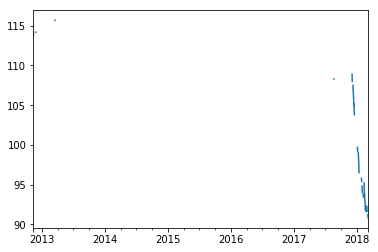

In [11]:
measurement_agg = pd.DataFrame(-1, columns=['Weight', 
                                            'dW',
                                            'Age',
                                            'BMI',
                                            'Height'
                                           ], index=pd.date_range(start=startDate, end=endDate ,freq='D'))

measurement_agg['Weight'] = measurement.groupby('Date')['Weight'].mean()
measurement_agg['Weight'].plot.line()

Look at the gaps in weight measrements above. Let's fix this

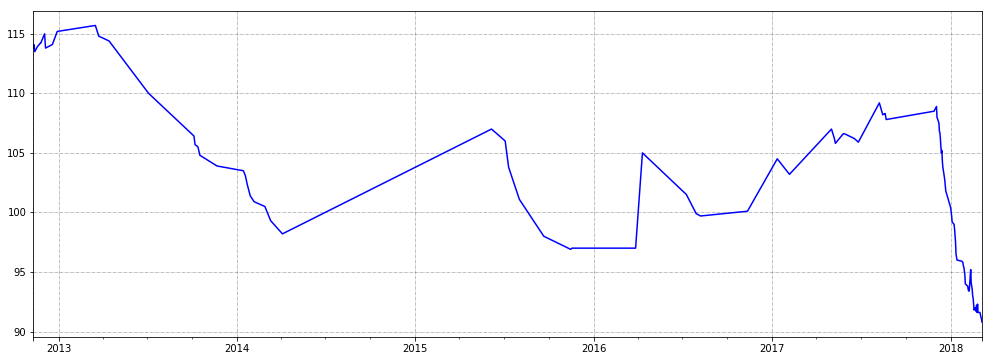

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(17, 6)

measurement_agg['Weight'].interpolate(inplace=True)
measurement_agg['Weight'].plot.line(color='b')
axes.grid(color='black', alpha=0.5, linestyle='-.', linewidth=0.5)

In [13]:
measurement_agg.head()

,Weight,dW,Age,BMI,Height
2012-11-10,113.80,-1,-1,-1,-1
2012-11-11,114.10,-1,-1,-1,-1
2012-11-12,113.80,-1,-1,-1,-1
2012-11-13,113.50,-1,-1,-1,-1
2012-11-14,113.58,-1,-1,-1,-1


Now let's fill in the data in the rest of the columns:

In [14]:
measurement_agg['Height'] = 1.76  #constant durting the entire period
measurement_agg['BMI'] = np.round(measurement_agg['Weight'] / measurement_agg['Height']**2,2)
measurement_agg['Age'] = np.round((measurement_agg.index - pd.Timestamp('1988-06-07')) / pd.Timedelta(days=365),1)
measurement_agg['dW'] = measurement_agg['Weight'].diff(periods=1)
measurement_agg.at[measurement_agg.index[0],'dW'] = 0

measurement_agg.fillna(value=0, inplace=True)
measurement_agg.head()

,Weight,dW,Age,BMI,Height
2012-11-10,113.80,0.00,24.4,36.74,1.76
2012-11-11,114.10,0.30,24.4,36.83,1.76
2012-11-12,113.80,-0.30,24.4,36.74,1.76
2012-11-13,113.50,-0.30,24.5,36.64,1.76
2012-11-14,113.58,0.08,24.5,36.67,1.76


## Data Engineering for the Nutrition Dataframe
Showing the structure of the nutrition dataframe

In [15]:
nutrition.head()

,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
Date,,,,,,,,,,,,,,,,,,
2012-11-10,Breakfast,230.0,18.8,2.6,4.0,8.0,0.0,0.0,120.2,190.0,5.4,3.2,1.2,12.8,0.0,0.0,34.0,8.0
2012-11-10,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0
2012-11-10,Dinner,829.2,56.1,22.6,3.7,19.5,0.0,0.0,281.0,1627.5,74.0,7.5,72.0,25.7,89.6,127.8,17.8,12.2
2012-11-11,Breakfast,574.0,28.4,18.7,0.0,0.0,0.0,0.0,186.0,0.0,60.7,0.0,53.9,18.5,0.0,0.0,0.0,0.0
2012-11-11,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0


For this dataframe I again see that we have multiple entries per day which I don't like at all. The first task would be aggregation into a new data frame. Every time we do aggregation we lose from the original data. Thus I have to add some categorical variables so I don't compromise my analysis.

In [16]:
nutrition_agg = pd.DataFrame(0, columns=[   'Number of Meals', 
                                            'Mean Calories per Meal',
                                            'Max Calories per Meal',
                                            'Min Calories per Meal',
                                            'Total Calories',
                                            'Total Calories from Fat %',
                                            'Total Calories from Carbs %',
                                            'Total Calories from Protein %',
                                            'Total Amount of Nutrients g'
                                           ], index=pd.date_range(start=startDate, end=endDate ,freq='D'))

nutrition_agg['Number of Meals'] = nutrition.groupby('Date')['Meal'].count()
nutrition_agg['Total Calories'] = np.round(nutrition.groupby('Date')['Calories'].sum(),0)
nutrition_agg['Mean Calories per Meal'] = np.round(nutrition.groupby('Date')['Calories'].mean(),0)
nutrition_agg['Max Calories per Meal'] = np.round(nutrition.groupby('Date')['Calories'].max(),0)
nutrition_agg['Min Calories per Meal'] = np.round(nutrition.groupby('Date')['Calories'].min(),0)

nutrition_agg['Total Calories from Fat %'] = np.round((nutrition.groupby('Date')['Fat (g)'].sum() * 9 / 
                                              nutrition_agg['Total Calories'])*100,2) 

nutrition_agg['Total Calories from Carbs %'] = np.round((nutrition.groupby('Date')['Carbohydrates (g)'].sum() * 4 / 
                                              nutrition_agg['Total Calories'])*100,2) 

nutrition_agg['Total Calories from Protein %'] = np.round((nutrition.groupby('Date')['Protein (g)'].sum() * 4 / 
                                              nutrition_agg['Total Calories'])*100,2) 

nutrition_agg['Total Amount of Nutrients g'] = np.round(nutrition.groupby('Date')['Fat (g)'].sum() + 
                                                        nutrition.groupby('Date')['Carbohydrates (g)'].sum() +
                                                        nutrition.groupby('Date')['Protein (g)'].sum(),2)
nutrition_agg['Cholesterol mg'] = nutrition.groupby('Date')['Cholesterol'].sum()
nutrition_agg['Potassium mg'] = nutrition.groupby('Date')['Potassium'].sum()
nutrition_agg['Sodium mg'] = nutrition.groupby('Date')['Sodium (mg)'].sum()
nutrition_agg['Fiber g'] = nutrition.groupby('Date')['Fiber'].sum()
nutrition_agg['Sugar g'] = nutrition.groupby('Date')['Sugar'].sum()
nutrition_agg['Vitamin A %'] = nutrition.groupby('Date')['Vitamin A'].sum()
nutrition_agg['Vitamin C %'] = nutrition.groupby('Date')['Vitamin C'].sum()
nutrition_agg['Calcium %'] = nutrition.groupby('Date')['Calcium'].sum()
nutrition_agg['Iron %'] = nutrition.groupby('Date')['Iron'].sum()

In [17]:
nutrition_agg.fillna(value=0, inplace=True)
nutrition_agg.head()

,Number of Meals,Mean Calories per Meal,Max Calories per Meal,Min Calories per Meal,Total Calories,Total Calories from Fat %,Total Calories from Carbs %,Total Calories from Protein %,Total Amount of Nutrients g,Cholesterol mg,Potassium mg,Sodium mg,Fiber g,Sugar g,Vitamin A %,Vitamin C %,Calcium %,Iron %
2012-11-10,3.0,621.0,829.0,230.0,1864.0,53.06,36.57,15.77,353.8,182.0,1817.5,2998.2,33.1,73.2,89.6,127.8,51.8,20.2
2012-11-11,4.0,516.0,805.0,72.0,2066.0,45.74,42.42,14.00,396.4,226.6,1638.6,3572.8,30.8,100.4,78.4,114.7,44.2,14.1
2012-11-12,3.0,978.0,1508.0,586.0,2934.0,57.94,33.16,12.50,523.8,197.6,2753.0,2510.0,21.7,112.9,84.7,128.8,55.0,28.8
2012-11-13,4.0,504.0,805.0,212.0,2015.0,40.73,42.86,14.25,378.9,650.6,1737.6,3496.8,36.4,74.3,88.5,93.5,48.2,69.2
2012-11-14,3.0,344.0,840.0,2.0,1032.0,30.52,55.04,17.83,223.0,80.0,0.0,2745.0,6.0,32.0,20.0,16.0,40.0,72.0


## Combining The Data

As all my dataframes have in fact the same number of rows with the same key values I can simply stich the dataframes together column-wise, this is done really easy in Pandas:

In [18]:
fullData = pd.concat([nutrition_agg, exercise_agg, measurement_agg], axis=1)

In [19]:
fullData.head()

,Number of Meals,Mean Calories per Meal,Max Calories per Meal,Min Calories per Meal,Total Calories,Total Calories from Fat %,Total Calories from Carbs %,Total Calories from Protein %,Total Amount of Nutrients g,Cholesterol mg,...,Iron %,Calories Burned,Cardio Minutes,Strength Training,Steps,Weight,dW,Age,BMI,Height
2012-11-10,3.0,621.0,829.0,230.0,1864.0,53.06,36.57,15.77,353.8,182.0,...,20.2,478.0,42.0,yes,0.0,113.80,0.00,24.4,36.74,1.76
2012-11-11,4.0,516.0,805.0,72.0,2066.0,45.74,42.42,14.00,396.4,226.6,...,14.1,577.0,55.0,yes,0.0,114.10,0.30,24.4,36.83,1.76
2012-11-12,3.0,978.0,1508.0,586.0,2934.0,57.94,33.16,12.50,523.8,197.6,...,28.8,482.0,55.0,no,0.0,113.80,-0.30,24.4,36.74,1.76
2012-11-13,4.0,504.0,805.0,212.0,2015.0,40.73,42.86,14.25,378.9,650.6,...,69.2,441.0,40.0,yes,0.0,113.50,-0.30,24.5,36.64,1.76
2012-11-14,3.0,344.0,840.0,2.0,1032.0,30.52,55.04,17.83,223.0,80.0,...,72.0,0.0,0.0,yes,0.0,113.58,0.08,24.5,36.67,1.76


So this was all the data which I have available. However to study the effects of the intermittent fasting I don't need all of that, as I started practicing it from **7th December 2017**. Since this date I have logged all my meals and excercies consistently, I only have some gaps for the weight as it is kind of pointless to weight yourself every day. Now I will slice the data and use only the numbers gathered after 7th Dec.

In [20]:
df = fullData['2017-12-07':]

I want to add one more column to our dataframe:

In [21]:
df.index.name = 'Date'
df['Net Calories'] = nutrition_agg['Total Calories'] - exercise_agg['Calories Burned']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Exploratory Data Analysis

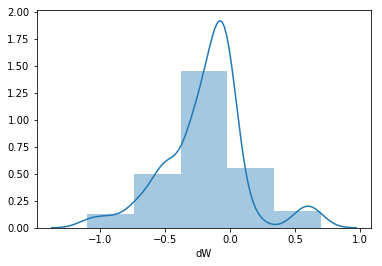

In [22]:
sns.distplot(df['dW'], bins=5)

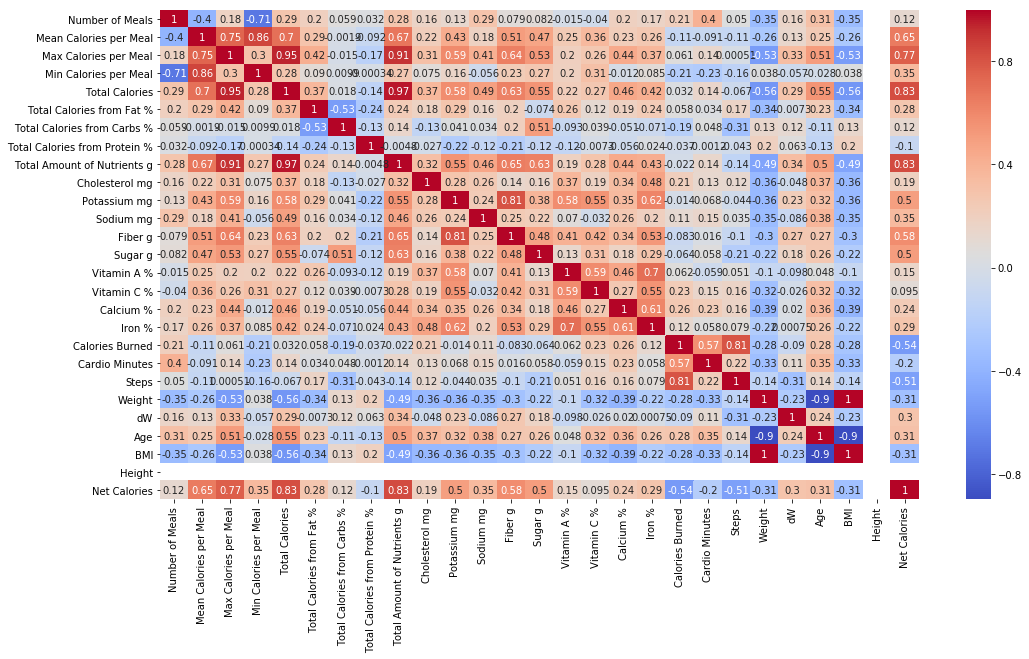

In [23]:
fig, ax = plt.subplots(figsize=(17,9)) # increasing the original size of the heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [24]:
df.describe()

,Number of Meals,Mean Calories per Meal,Max Calories per Meal,Min Calories per Meal,Total Calories,Total Calories from Fat %,Total Calories from Carbs %,Total Calories from Protein %,Total Amount of Nutrients g,Cholesterol mg,...,Iron %,Calories Burned,Cardio Minutes,Steps,Weight,dW,Age,BMI,Height,Net Calories
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00,90.000000
mean,1.500000,1131.722222,1500.011111,767.177778,1563.966667,58.369222,14.560667,24.406222,255.838889,326.502222,...,44.572222,961.044444,9.577778,14954.022222,97.115833,-0.188333,29.641111,31.351667,1.76,602.922222
std,0.565884,597.256218,643.398534,827.951792,685.734060,15.362152,9.577856,10.278804,116.568668,331.749620,...,28.295253,457.923989,14.134171,7656.982185,4.654589,0.316743,0.079173,1.502501,0.00,812.321742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,27.000000,1.000000,27.000000,90.800000,-1.100000,29.500000,29.310000,1.76,-1157.000000
25%,1.000000,709.500000,1074.250000,8.000000,1145.500000,52.720000,8.192500,17.825000,176.525000,0.000000,...,25.600000,628.000000,1.000000,9316.750000,93.525000,-0.300000,29.600000,30.190000,1.76,40.000000
50%,1.000000,972.000000,1495.000000,507.500000,1584.500000,62.280000,11.500000,23.645000,247.400000,204.500000,...,47.300000,997.000000,1.000000,16952.000000,95.935000,-0.140000,29.600000,30.970000,1.76,461.500000
75%,2.000000,1496.500000,1886.500000,1460.000000,1947.000000,69.017500,18.457500,26.817500,324.800000,555.000000,...,57.400000,1240.500000,12.750000,21391.750000,100.785000,-0.017500,29.700000,32.537500,1.76,1019.500000
max,3.000000,2879.000000,3868.000000,2879.000000,3874.000000,86.150000,57.840000,62.120000,722.000000,1312.000000,...,137.200000,1919.000000,52.000000,25523.000000,107.625000,0.700000,29.800000,34.740000,1.76,3606.000000


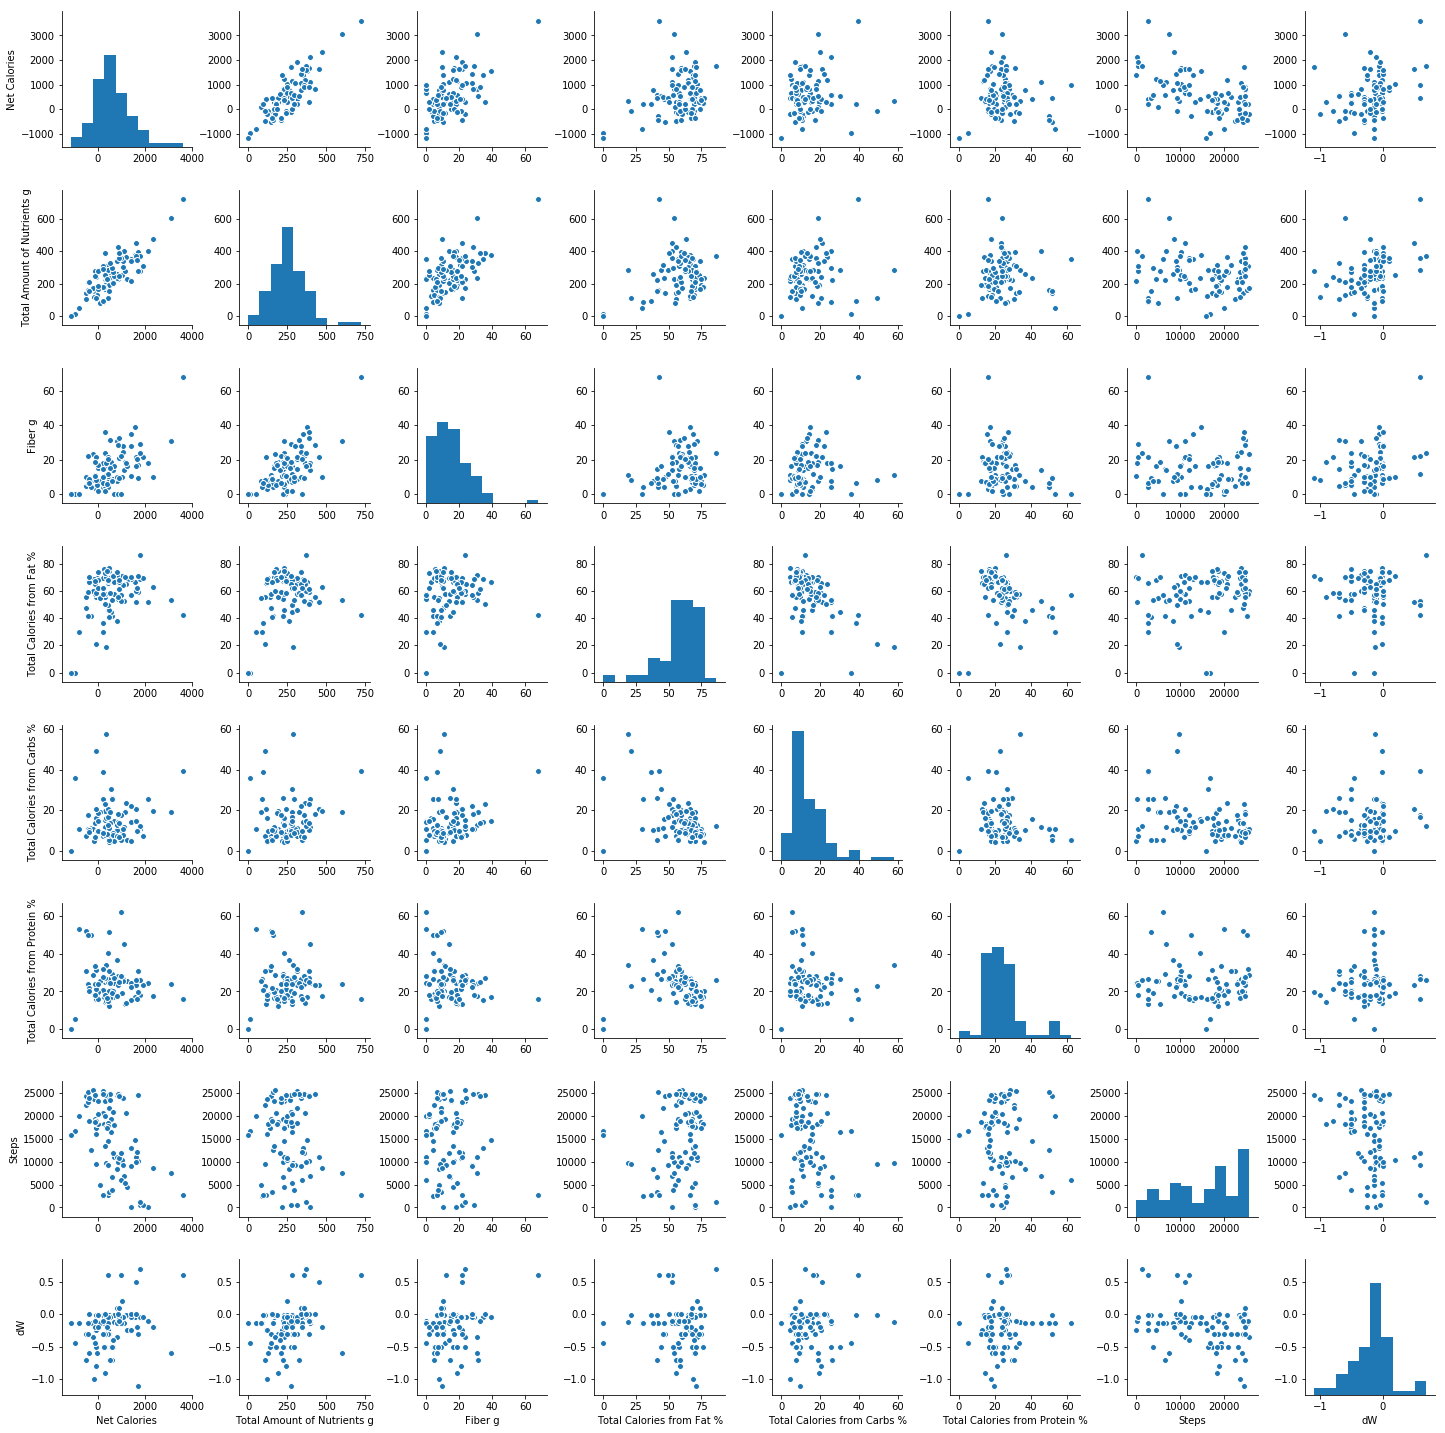

In [25]:
df_vis = df[['Net Calories', 'Total Amount of Nutrients g', 'Fiber g', 'Total Calories from Fat %', 
             'Total Calories from Carbs %', 'Total Calories from Protein %', 'Steps', 'dW']]

sns.pairplot(df_vis)

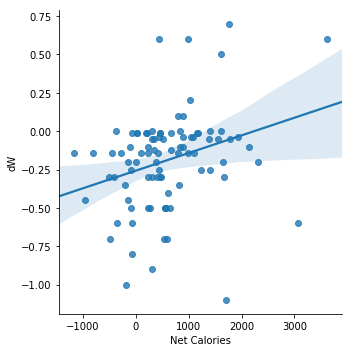

In [26]:
sns.lmplot(y='dW', x='Net Calories', data=df)

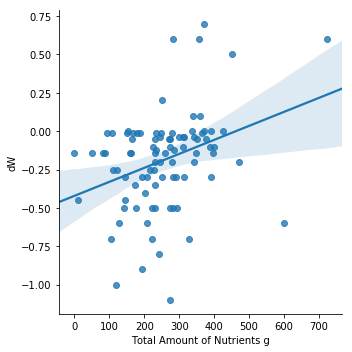

In [27]:
sns.lmplot(y='dW', x='Total Amount of Nutrients g', data=df)

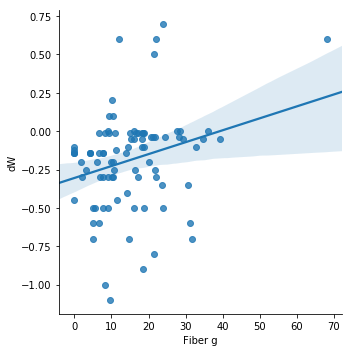

In [28]:
sns.lmplot(y='dW', x='Fiber g', data=df)

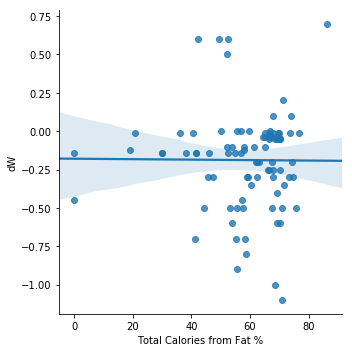

In [29]:
sns.lmplot(y='dW', x='Total Calories from Fat %', data=df)

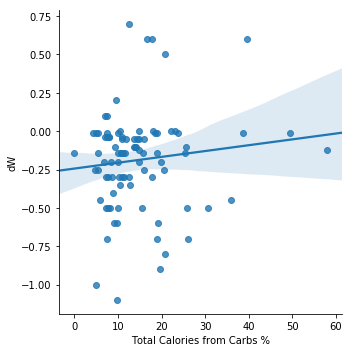

In [30]:
sns.lmplot(y='dW', x='Total Calories from Carbs %', data=df)

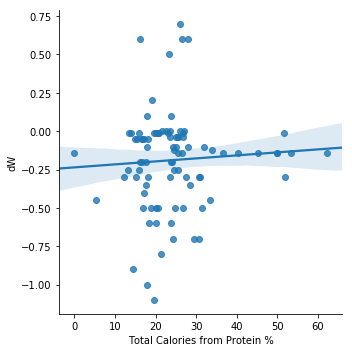

In [31]:
sns.lmplot(y='dW', x='Total Calories from Protein %', data=df)

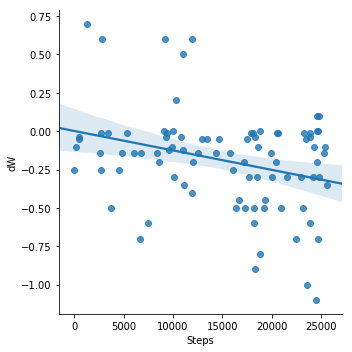

In [32]:
sns.lmplot(y='dW', x='Steps', data=df)

In [34]:
#sns.clustermap(df.corr())

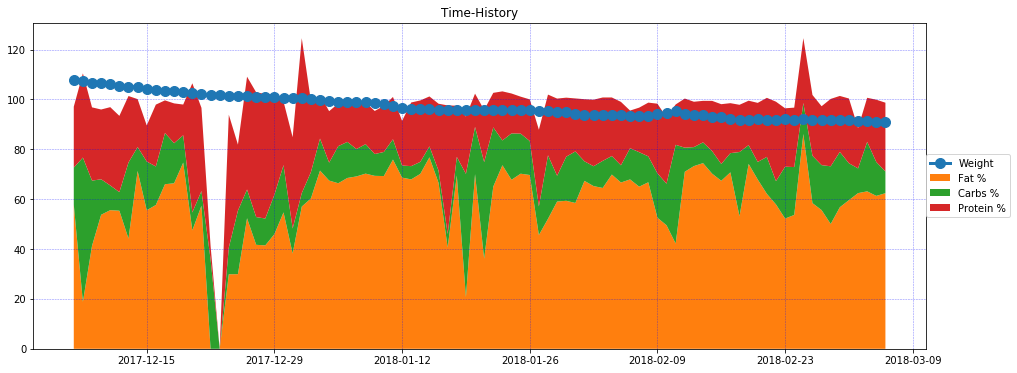

In [35]:
fig, axes = plt.subplots()

fig.set_size_inches(16, 6)

axes.plot(df.index, df['Weight'], lw=3, marker='o', markersize=10)

labels = ["Fat % ", "Carbs %", "Protein %"]
axes.stackplot(df.index, df['Total Calories from Fat %'], 
                         df['Total Calories from Carbs %'], 
                         df['Total Calories from Protein %'],
                         labels = labels)

axes.legend(loc=7, bbox_to_anchor=(1.1, 0.5))
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

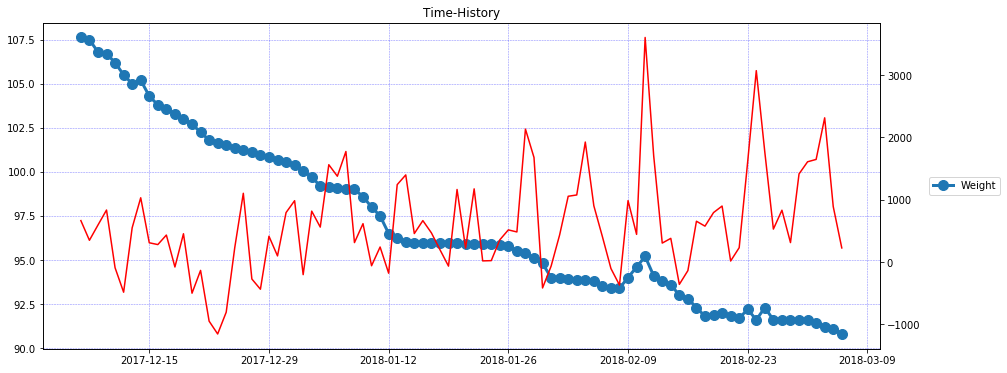

In [36]:
fig, axes = plt.subplots()

fig.set_size_inches(15, 6)

axes.plot(df.index, df['Weight'], lw=3, marker='o', markersize=10)

ax2 = axes.twinx()
ax2.plot(df.index, df['Net Calories'], 'r')

axes.legend(loc=7, bbox_to_anchor=(1.15, 0.5))
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

## Linear Regression

In [37]:
df.columns

Index(['Number of Meals', 'Mean Calories per Meal', 'Max Calories per Meal',
       'Min Calories per Meal', 'Total Calories', 'Total Calories from Fat %',
       'Total Calories from Carbs %', 'Total Calories from Protein %',
       'Total Amount of Nutrients g', 'Cholesterol mg', 'Potassium mg',
       'Sodium mg', 'Fiber g', 'Sugar g', 'Vitamin A %', 'Vitamin C %',
       'Calcium %', 'Iron %', 'Calories Burned', 'Cardio Minutes',
       'Strength Training', 'Steps', 'Weight', 'dW', 'Age', 'BMI', 'Height',
       'Net Calories'],
      dtype='object')

In [38]:
X = df[['Net Calories', 'Steps', 'Total Amount of Nutrients g', 'Fiber g']]

y = df['dW']

Accuracy on the training Set 39.65 %
Accuracy on the testing Set -162.61 %
MAE: 0.22177207094
MSE: 0.0872487204971
RMSE: 0.295378943896


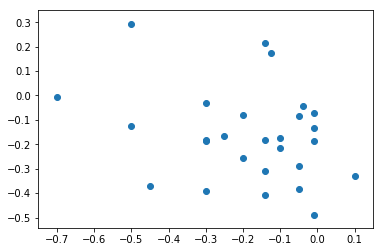

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

prediction = lm.predict(X_test)

acc_lm_train = round(lm.score(X_train, y_train) * 100, 2)
acc_lm_test = round(lm.score(X_test, y_test) * 100 ,2)
print("Accuracy on the training Set", round(acc_lm_train,2,), "%")
print("Accuracy on the testing Set", round(acc_lm_test,2,), "%")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

plt.scatter(y_test,prediction)

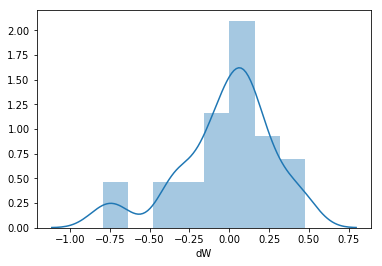

In [40]:
sns.distplot((y_test-prediction))

## Random Forest

Accuracy on the training Set 60.44 %
Accuracy on the testing Set -63.81 %
MAE: 0.191732544882
MSE: 0.0544218620049
RMSE: 0.233284937373


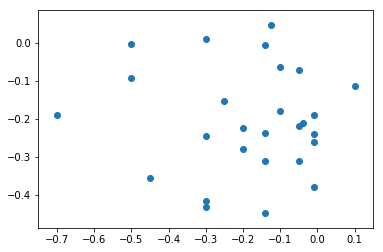

In [41]:
from sklearn.ensemble import RandomForestRegressor

features = X.columns

forest = RandomForestRegressor(n_estimators=500, random_state = 0, oob_score = True, max_depth=3)
forest.fit(X_train, y_train)

prediction = forest.predict(X_test)

forest.score(X_train,y_train)
acc_forest_train = round(forest.score(X_train, y_train) * 100, 2)
acc_forest_test = round(forest.score(X_test, y_test) * 100 ,2)

print("Accuracy on the training Set", round(acc_forest_train,2,), "%")
print("Accuracy on the testing Set", round(acc_forest_test,2,), "%")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

plt.scatter(y_test,prediction)

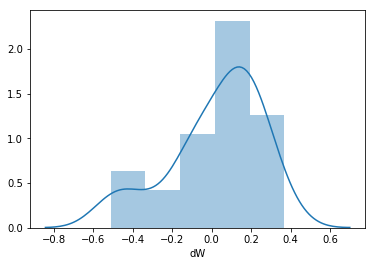

In [42]:
sns.distplot((y_test-prediction))

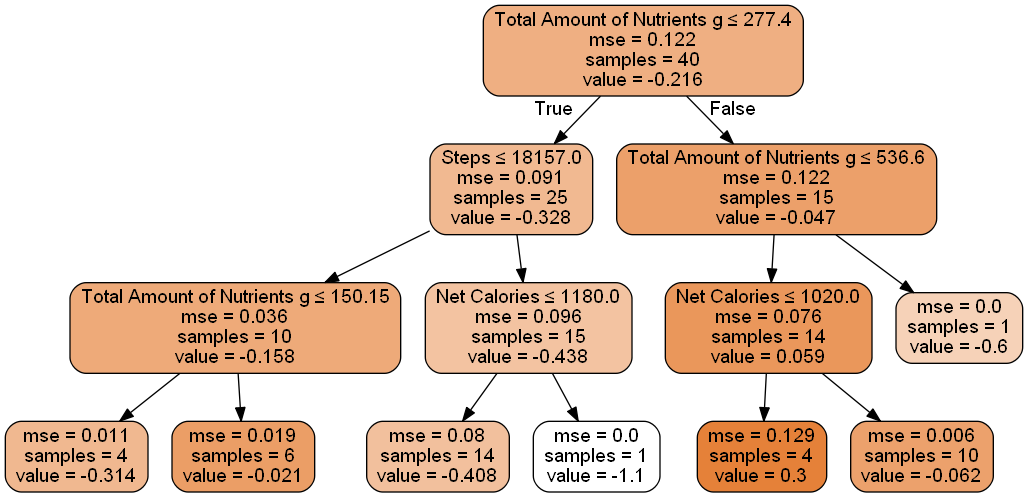

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

import os     
os.environ["PATH"] += os.pathsep + 'C:/anaconda3/Library/bin/graphviz'

dot_data = StringIO()
export_graphviz(forest[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Linear Regression using StatsModels not Sckikit-Learn

In [44]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_train)
prediction = lm1.fit()

print(prediction.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                     dW   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     9.528
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           5.44e-06
Time:                        20:40:29   Log-Likelihood:                -8.6022
No. Observations:                  63   AIC:                             27.20
Df Residuals:                      58   BIC:                             37.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## New Approach Needed

It seems that I will not be able to find what causes weight loss looking only in short term results - dW. This means that I need to construct new variables and new ways to measure what is actually taking place in my body. So let's start.

But first let's check what we have so far:

In [45]:
df.head()

,Number of Meals,Mean Calories per Meal,Max Calories per Meal,Min Calories per Meal,Total Calories,Total Calories from Fat %,Total Calories from Carbs %,Total Calories from Protein %,Total Amount of Nutrients g,Cholesterol mg,...,Calories Burned,Cardio Minutes,Strength Training,Steps,Weight,dW,Age,BMI,Height,Net Calories
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-07,1.0,1436.0,1436.0,1436.0,1436.0,57.79,14.90,24.43,233.4,0.0,...,772.0,5.0,no,10994.0,107.625,-0.125,29.5,34.74,1.76,664.0
2017-12-08,2.0,570.0,935.0,206.0,1141.0,18.85,57.84,33.79,285.3,0.0,...,793.0,17.0,no,9634.0,107.500,-0.125,29.5,34.70,1.76,348.0
2017-12-09,2.0,602.0,1205.0,0.0,1205.0,41.30,26.16,29.38,222.6,0.0,...,612.0,1.0,no,6631.0,106.800,-0.700,29.5,34.48,1.76,593.0
2017-12-10,1.0,1366.0,1366.0,1366.0,1366.0,53.76,14.23,27.99,225.8,0.0,...,532.0,1.0,no,9932.0,106.700,-0.100,29.5,34.45,1.76,834.0
2017-12-11,1.0,861.0,861.0,861.0,861.0,55.61,9.90,31.41,142.1,117.8,...,954.0,1.0,no,17256.0,106.200,-0.500,29.5,34.28,1.76,-93.0


In [46]:
df.columns

Index(['Number of Meals', 'Mean Calories per Meal', 'Max Calories per Meal',
       'Min Calories per Meal', 'Total Calories', 'Total Calories from Fat %',
       'Total Calories from Carbs %', 'Total Calories from Protein %',
       'Total Amount of Nutrients g', 'Cholesterol mg', 'Potassium mg',
       'Sodium mg', 'Fiber g', 'Sugar g', 'Vitamin A %', 'Vitamin C %',
       'Calcium %', 'Iron %', 'Calories Burned', 'Cardio Minutes',
       'Strength Training', 'Steps', 'Weight', 'dW', 'Age', 'BMI', 'Height',
       'Net Calories'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

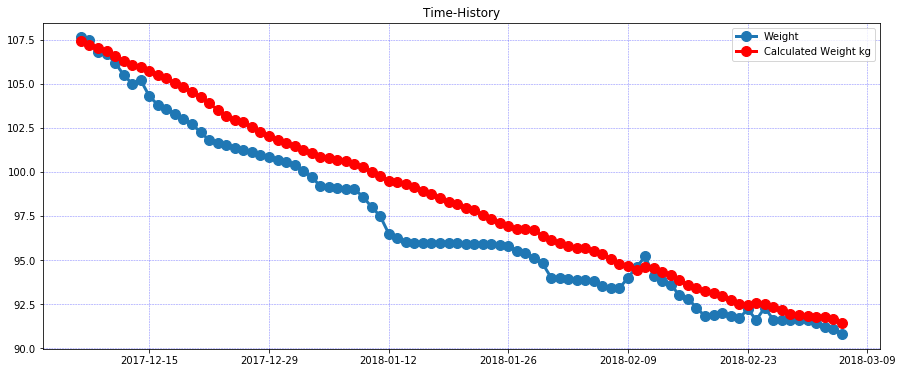

In [47]:
df['Streak'] = range(0,len(df.index),1)
df['BMR'] = 10*df['Weight'] + 625*df['Height'] + 5*df['Age'] + 5
df['Caloric Balance'] = df['Net Calories'] - df['BMR']
df['Cumulative Caloric Balance'] = df['Caloric Balance'].cumsum()
df['Calculated Weight kg'] = df.ix[0]['Weight'] + df['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(15, 6)

axes.plot(df.index, df['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df.index, df['Calculated Weight kg'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

You see that using the simple calories equation almost got me a realistic estimate of the weight loss process. However there are other factors which drive the weight loss process, you see that they are actually accelerating it ... This is what I want to find out, what are these factors. But first let's calculate what was my exact BMR during each day:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

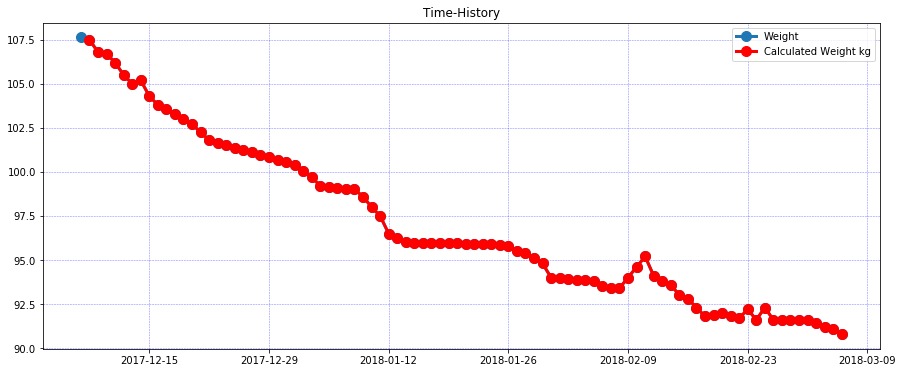

In [48]:
df['Cumulative Caloric Balance A'] = (df['Weight'] - df.ix[0]['Weight'])*9000
df['Caloric Balance A'] = df['Cumulative Caloric Balance A'].diff()
df['Daily BMR'] = df['Caloric Balance A'] - df['Net Calories']

df['Caloric Balance'] = df['Net Calories'] + df['Daily BMR']
df['Cumulative Caloric Balance'] = df['Caloric Balance'].cumsum()
df['Calculated Weight kg'] = df.ix[0]['Weight'] + df['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(15, 6)

axes.plot(df.index, df['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df.index, df['Calculated Weight kg'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

In [49]:
df['Daily BMR'].describe()

count       89.000000
mean     -2303.640449
std       2738.696618
min     -11606.000000
25%      -3648.000000
50%      -1827.000000
75%       -795.000000
max       4957.000000
Name: Daily BMR, dtype: float64

Ok now I have my daily BMR values, let's run a regression to see if there is a pattern.

In [50]:
df.columns

Index(['Number of Meals', 'Mean Calories per Meal', 'Max Calories per Meal',
       'Min Calories per Meal', 'Total Calories', 'Total Calories from Fat %',
       'Total Calories from Carbs %', 'Total Calories from Protein %',
       'Total Amount of Nutrients g', 'Cholesterol mg', 'Potassium mg',
       'Sodium mg', 'Fiber g', 'Sugar g', 'Vitamin A %', 'Vitamin C %',
       'Calcium %', 'Iron %', 'Calories Burned', 'Cardio Minutes',
       'Strength Training', 'Steps', 'Weight', 'dW', 'Age', 'BMI', 'Height',
       'Net Calories', 'Streak', 'BMR', 'Caloric Balance',
       'Cumulative Caloric Balance', 'Calculated Weight kg',
       'Cumulative Caloric Balance A', 'Caloric Balance A', 'Daily BMR'],
      dtype='object')

In [51]:
'''X = df[['Number of Meals', 
       'Total Calories', 
       'Total Calories from Fat %',
       'Total Calories from Carbs %', 
       'Total Calories from Protein %',
       'Total Amount of Nutrients g', 
       'Cholesterol mg', 
       'Potassium mg',
       'Sodium mg', 
       'Fiber g', 
       'Sugar g', 
       'Vitamin A %', 
       'Vitamin C %',
       'Calcium %', 
       'Iron %', 
       'Cardio Minutes',
       'Net Calories'
       ]]'''

X = df[[
       'Total Calories from Fat %',
       'Potassium mg',
       'Sugar g', 
       'Vitamin C %',
       'Calcium %', 
       'Iron %', 
       'Cardio Minutes',
       'Net Calories'
       ]]

'''X = df[[
       'Total Calories from Carbs %', 
       'Vitamin C %',
       'BMI',
       ]]'''

y = df['Daily BMR']
y.ix[0] = np.mean(y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
X.head()

,Total Calories from Fat %,Potassium mg,Sugar g,Vitamin C %,Calcium %,Iron %,Cardio Minutes,Net Calories
Date,,,,,,,,
2017-12-07,57.79,0.0,8.4,0.0,0.0,0.0,5.0,664.0
2017-12-08,18.85,715.4,45.4,161.6,23.1,38.7,17.0,348.0
2017-12-09,41.30,80.0,27.5,134.5,20.5,37.0,1.0,593.0
2017-12-10,53.76,0.0,27.4,0.0,0.0,0.0,1.0,834.0
2017-12-11,55.61,153.8,14.5,148.0,23.2,38.4,1.0,-93.0


## Random Forest

In [53]:
features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
    
param_grid = { 
        "n_estimators"      : [10],
        "min_samples_leaf"  : range(1,21,1),
        "min_samples_split" : range(2,11,1),
        "max_depth"         : range(2,11,1),
        "oob_score"         : [True],
        "random_state"      : [0]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, return_train_score=True, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10], 'min_samples_leaf': range(1, 21), 'min_samples_split': range(2, 11), 'max_depth': range(2, 11), 'oob_score': [True], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
grid.best_score_ , grid.best_params_

(-6974153.1984579554,
 {'max_depth': 2,
  'min_samples_leaf': 16,
  'min_samples_split': 2,
  'n_estimators': 10,
  'oob_score': True,
  'random_state': 0})

Accuracy on the training Set 24.4 %
Accuracy on the testing Set -17.03 %
Out-of-bound score  -0.26
RMSE on Training Set: 2286.0
RMSE on Testing Set: 3021.0


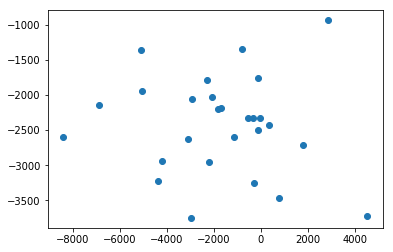

In [56]:
forest = RandomForestRegressor(n_estimators=10, random_state = 0, 
                               oob_score = True, min_samples_leaf=7, max_depth = 2,
                               min_samples_split=2)
forest.fit(X_train, y_train)

prediction = forest.predict(X_test)

print("Accuracy on the training Set", round(forest.score(X_train, y_train) * 100, 2), "%")
print("Accuracy on the testing Set", round(forest.score(X_test, y_test) * 100 ,2), "%")
print("Out-of-bound score ", round(forest.oob_score_,2))
print('RMSE on Training Set:', np.round(np.sqrt(metrics.mean_squared_error(y_train, forest.predict(X_train))),0))
print('RMSE on Testing Set:', np.round(np.sqrt(metrics.mean_squared_error(y_test, forest.predict(X_test))),0))

plt.scatter(y_test,prediction)

([<matplotlib.axis.YTick at 0x251a63982e8>,
 <a list of 8 Text yticklabel objects>)

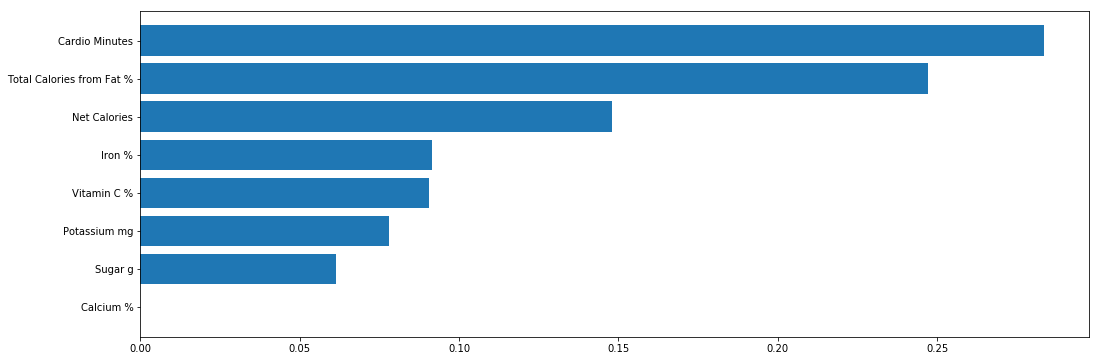

In [57]:
forest.feature_importances_

bar_x = range(len(forest.feature_importances_))

indices = np.argsort(forest.feature_importances_)
sorted_importances = []

for i in indices:
    sorted_importances.append(X.columns[i])

fig, ax = plt.subplots(figsize=(17,6))
plt.barh(bar_x, forest.feature_importances_[indices])
plt.yticks(bar_x, sorted_importances)

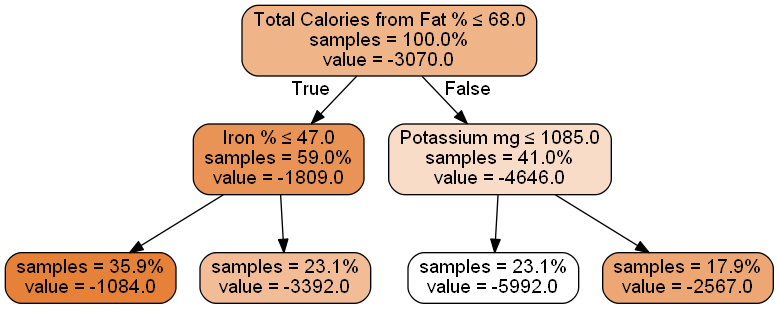

In [58]:
tree_scores = [tree.score(X_train, y_train) for tree in forest]

best_tree = tree_scores.index(max(tree_scores))

dot_data = StringIO()
export_graphviz(forest[best_tree], 
                out_file=dot_data,  
                filled=True,
                precision=0,
                special_characters=True,
                feature_names=features,
                leaves_parallel=True,
                rounded=True,
                rotate=False, 
                proportion=True, 
                impurity=False
               )
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

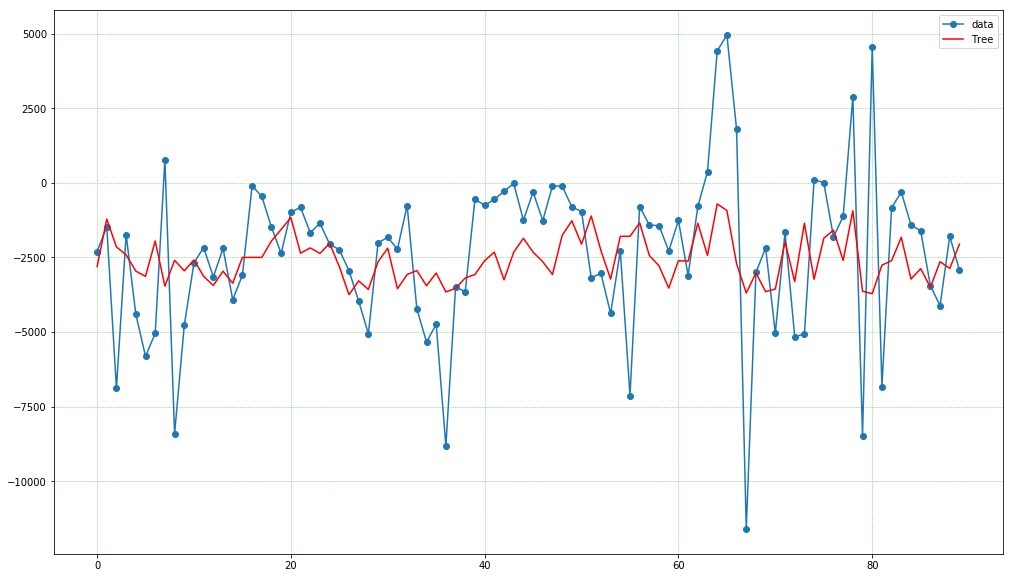

In [59]:
fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df['Streak'], y, 'o-', label="data")
ax.plot(df['Streak'], forest.predict(X), 'r', label="Tree")
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

## OLS

In [60]:
lm2 = sm.OLS(y, X)
prediction = lm2.fit(use_t=True, )

In [61]:
print(prediction.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.415     
Dependent Variable:    Daily BMR           AIC:                   1686.4421 
Date:                  2018-03-09 20:41    BIC:                   1706.4406 
No. Observations:      90                  Log-Likelihood:        -835.22   
Df Model:              8                   F-statistic:           8.992     
Df Residuals:          82                  Prob (F-statistic):    8.95e-09  
R-squared:             0.467               Scale:                 7.3903e+06
----------------------------------------------------------------------------
                           Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
Total Calories from Fat % -41.3432  10.0936 -4.0960 0.0000 -61.1264 -21.5601
Potassium mg                0.8461   0.4699  1.8006 0.0718  -0.0749   1.7670
Sugar g               

In [62]:
prediction.predict([80,500,25,100,20,1,60,1500])

array([-889.14168978])

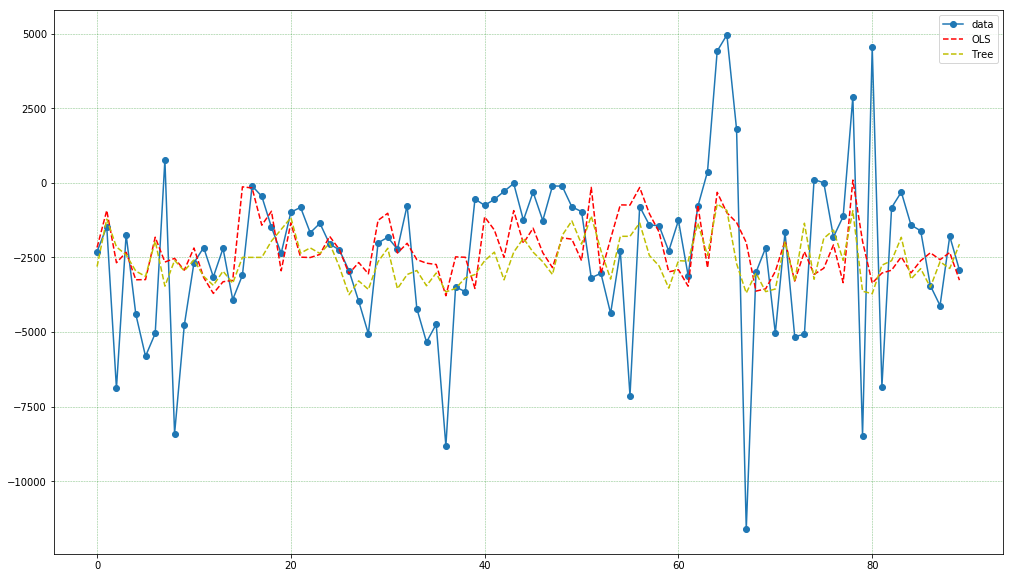

In [63]:
prstd, iv_l, iv_u = wls_prediction_std(prediction)

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df['Streak'], y, 'o-', label="data")
ax.plot(df['Streak'], prediction.fittedvalues, 'r--', label="OLS")
ax.plot(df['Streak'], forest.predict(X), 'y--', label="Tree")
#ax.plot(df['Streak'], iv_u, 'r--')
#ax.plot(df['Streak'], iv_l, 'r--')
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

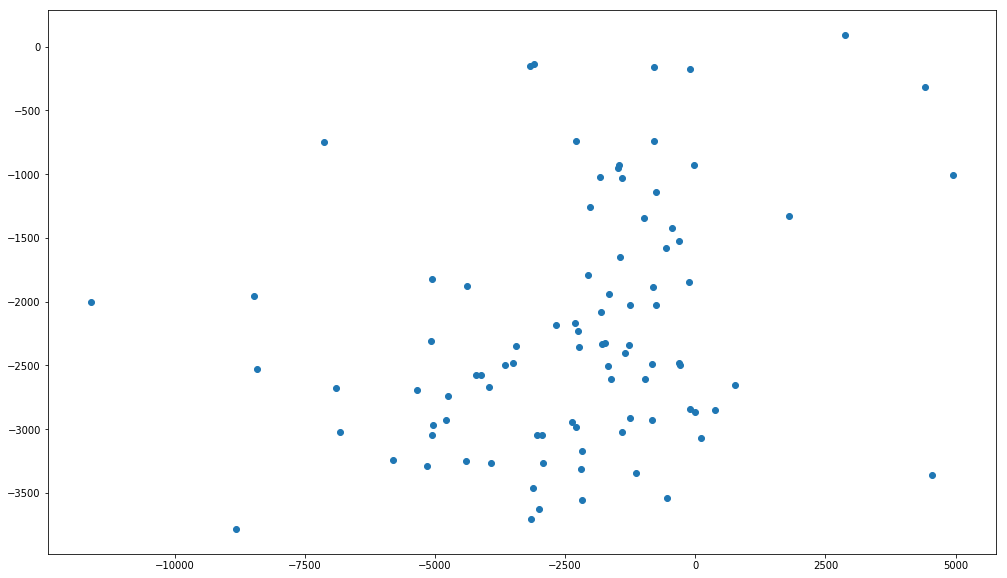

In [64]:
fig, ax = plt.subplots(figsize=(17,10))
plt.scatter(y,prediction.fittedvalues)

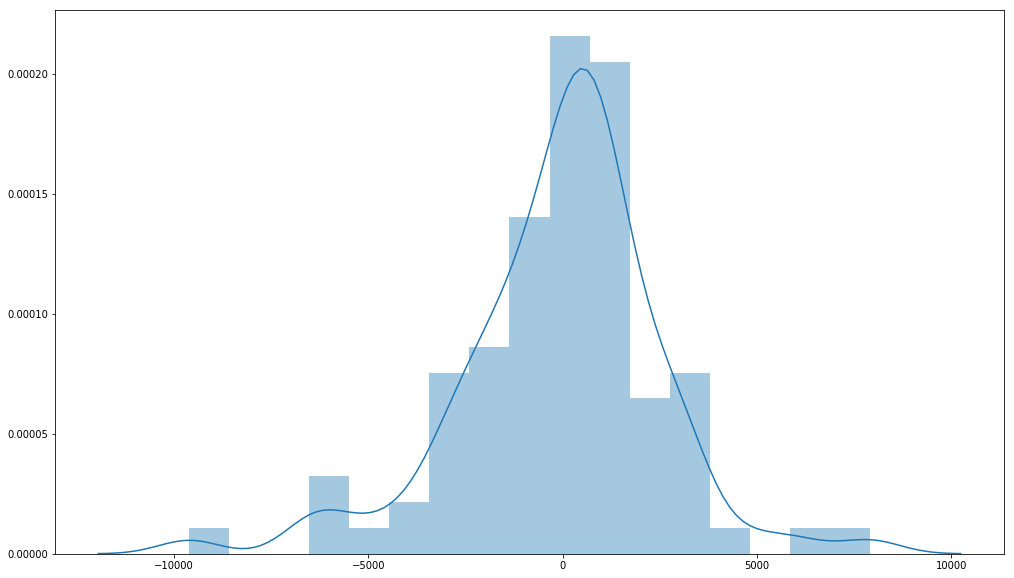

In [65]:
fig, ax = plt.subplots(figsize=(17,10))
sns.distplot(y-prediction.fittedvalues)

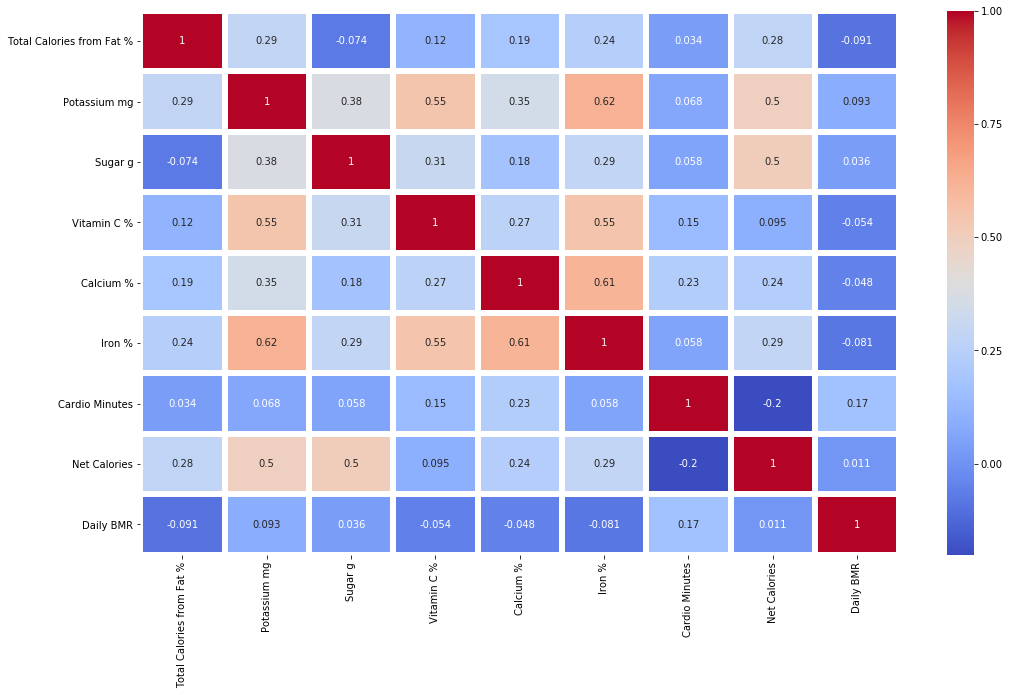

In [66]:
df_corr =  df[[
       'Total Calories from Fat %',
       'Potassium mg',
       'Sugar g', 
       'Vitamin C %',
       'Calcium %', 
       'Iron %', 
       'Cardio Minutes',
       'Net Calories', 
       'Daily BMR'
       ]]

fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=True, linewidths=5, )

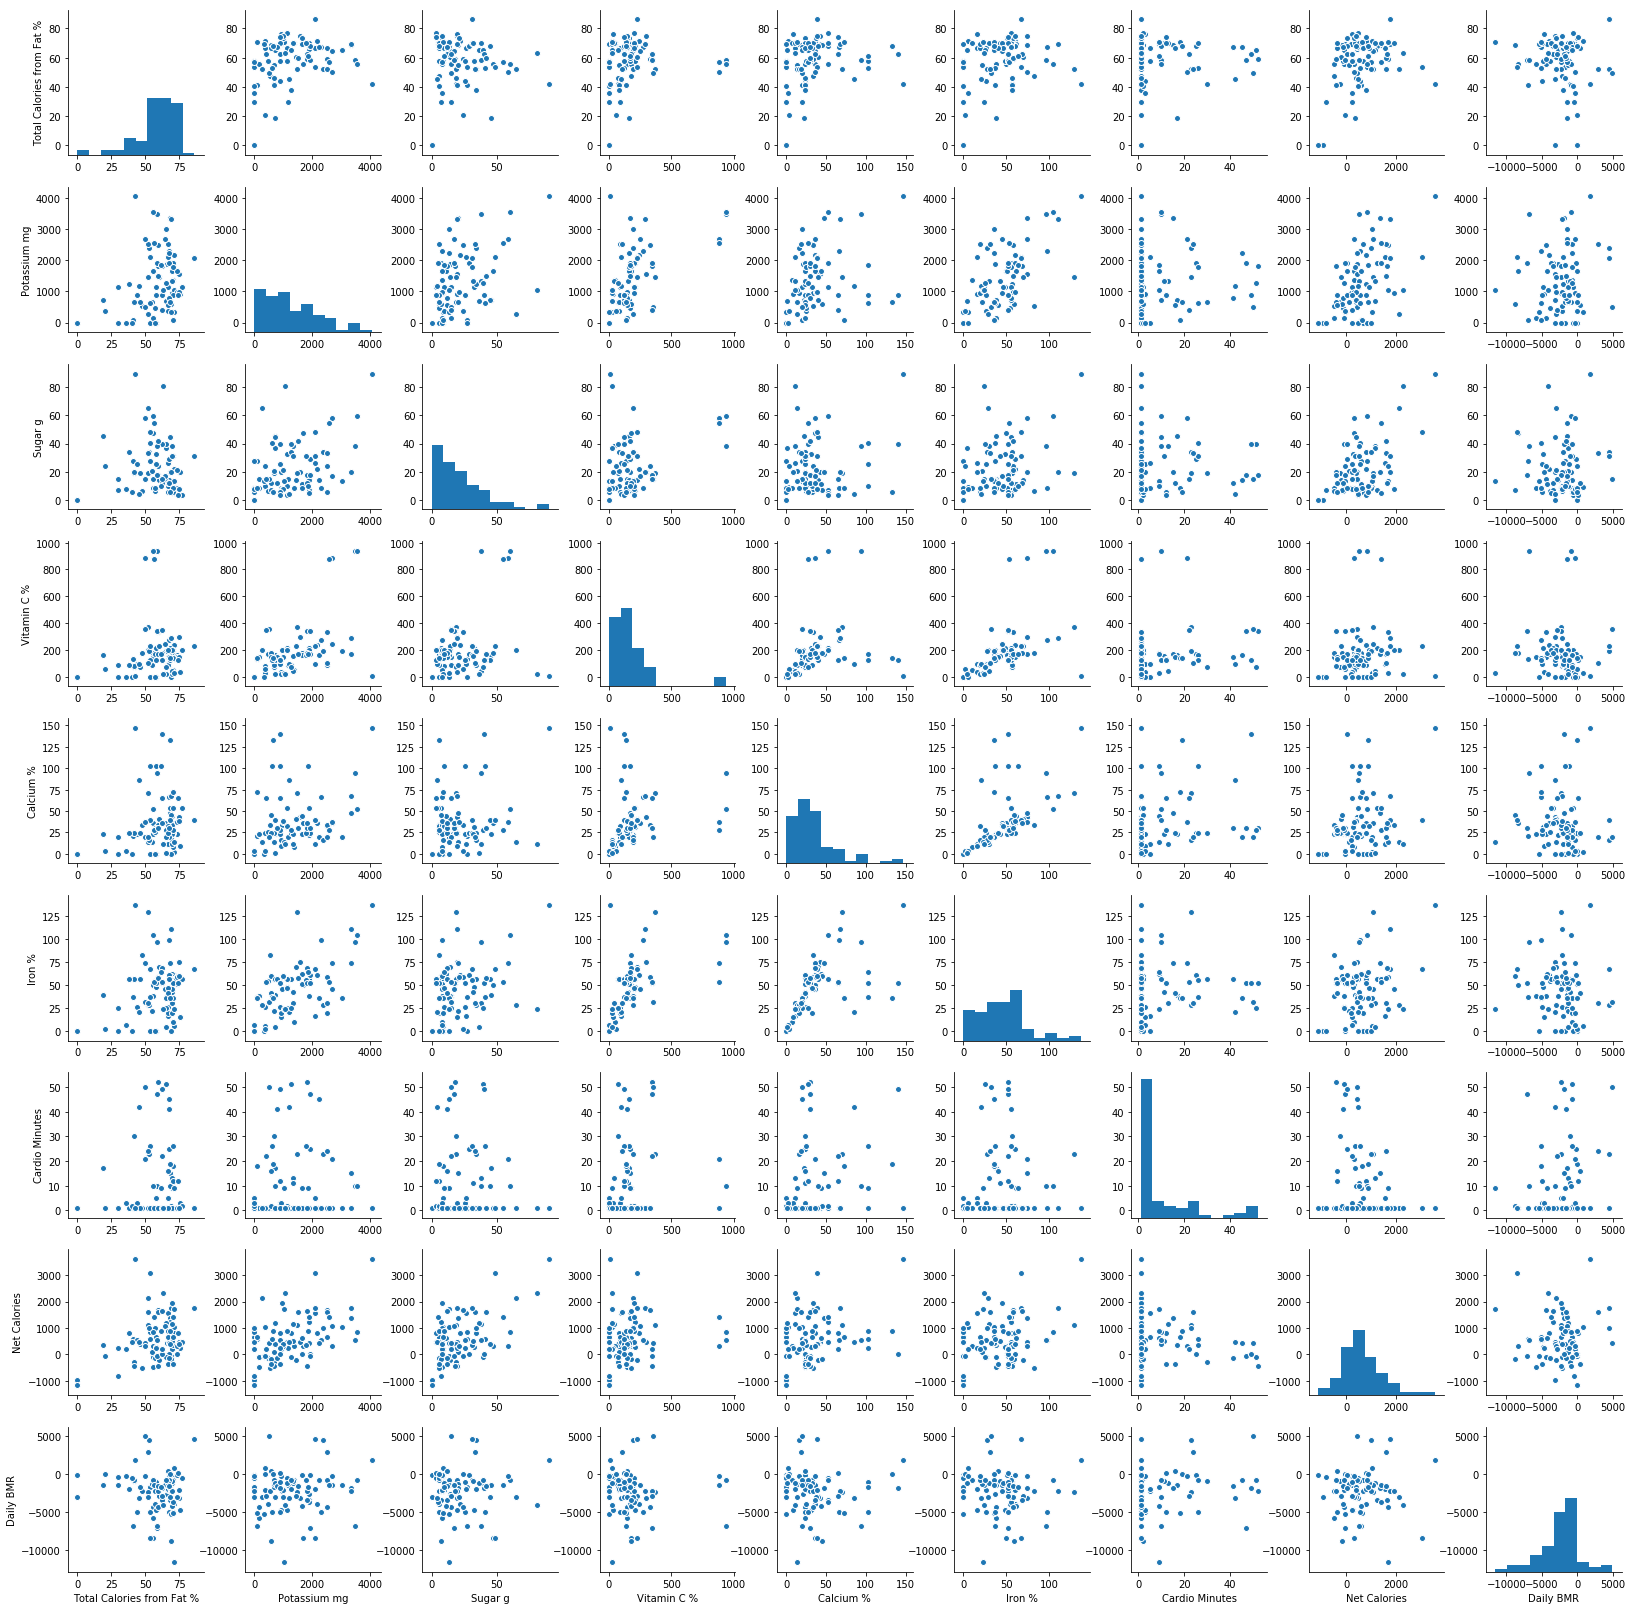

In [67]:
sns.pairplot(df_corr)

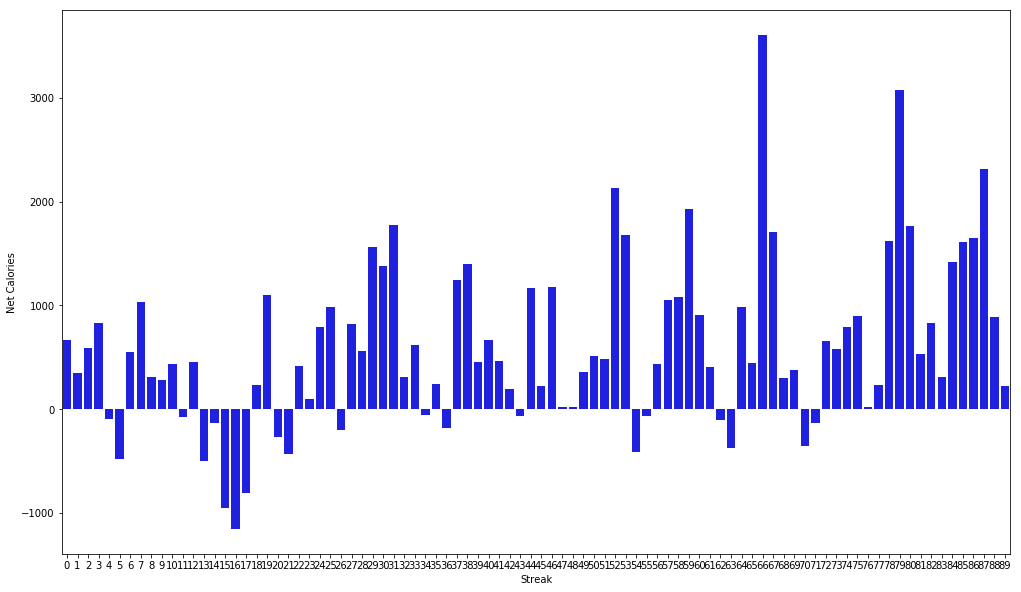

In [68]:
fig, ax = plt.subplots(figsize=(17,10))
sns.barplot(x = df['Streak'], y = df['Net Calories'], color='b')